## This notebook is meant to be run to test machine learning models, and look at examples of predictions. This code can be run without running any other notebooks and will run quickly and efficiently without needing to scrape any data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET=os.getenv('CLIENT_SECRET')
APP_NAME=os.getenv('APP_NAME')
REDDIT_USERNAME=os.getenv('REDDIT_USERNAME')
REDDIT_PASSWORD=os.getenv('REDDIT_PASSWORD')

import praw
import pandas as pd
import datetime as dt

reddit = praw.Reddit(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, user_agent=APP_NAME, username=REDDIT_USERNAME, password=REDDIT_PASSWORD)

print(reddit.user.me())

%matplotlib inline

Version 7.1.0 of praw is outdated. Version 7.2.0 was released Wednesday February 24, 2021.


mattcat26


In [2]:
comments_df = pd.read_csv('files/compiled_comments_2_25_2021.csv')
comments_df

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,...,adjWordScore,profanity,contains_!,no_url_WordScore,no_url_WholeScore,WordScoreNoStop,WholeScoreNoStop,no_url_or_stops_WholeScore,no_url_or_stops_WordScore,no_url_or_stops_content
0,True,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655,0.001573,False,...,0.000000,False,False,0.000000,0.816813,0.000000,0.773069,0.736582,0.000000,So implications here? Does affect involved Vis...
1,True,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283,0.255802,False,...,0.000000,False,True,0.000000,0.884829,0.000000,0.857654,0.844658,0.000000,Sadly isn't new. Police officers use faulty te...
2,True,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078,0.000000,False,...,-0.038865,False,False,-0.038865,0.866455,-0.038865,0.833865,0.785302,-0.038865,What's disturbing government destroying lives ...
3,True,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426,0.000000,True,...,-0.015000,False,False,0.000000,0.884435,0.000000,0.865826,0.852412,0.000000,What I find concerning horrible response law e...
4,True,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127,0.000000,False,...,0.000000,False,False,0.000000,0.835723,0.000000,0.826162,0.804306,0.000000,This subject legs article opinion piece editor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,True,"Yes, while in East Baghdad my platoons mission...",CapitalCockroach,NaN,bav0rl,ekggrgk,1.070477,0.840028,0.000000,True,...,1.020477,False,False,1.070477,0.831097,1.000532,0.827872,0.788655,1.000532,"Yes, East Baghdad platoons mission check build..."
10232,True,The [definition the FBI currently uses for int...,CQME,NaN,bav0rl,ekyelps,0.941533,0.882768,0.217543,True,...,0.885283,False,False,0.884132,0.870870,0.606157,0.852373,0.843292,0.600762,The [definition FBI currently uses internation...
10233,True,[Yes.](https://en.m.wikipedia.org/wiki/Islamic...,Silent_As_The_Grave_,NaN,bav0rl,ekehcqg,0.217683,0.779386,0.000000,True,...,0.161433,True,False,0.217683,0.833056,0.369440,0.782545,0.800717,0.369440,[Yes.] Have look allies with. Hezbollah fucks ...
10234,True,Has ANY Shia ever committed an act of terroris...,bsmdphdjd,NaN,bav0rl,ekfp4ls,1.293729,0.861529,0.000000,False,...,1.143729,False,False,1.293729,0.847163,1.788263,0.834425,0.792615,1.788263,Has ANY Shia committed act terrorism U.S.?\n\n...


In [3]:
# comments_df = comments_df.replace({'action': {'removecomment': 0, 'approvecomment': 0, np.nan: 1}})

In [4]:
# comments_df['action'] = comments_df['action'].astype('bool')

In [5]:
# comments_df

Currently, 51% of the comments are good and 49% are bad...this is a pretty good ratio

In [6]:
# comments_df.to_csv('files/compiled_comments_2_25_2021.csv', index=False)

In [7]:
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import *

In [8]:
X = comments_df[['WordScore', 'WholeScore']]
X = X.to_numpy()
y = comments_df['action']
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=random.randint(0, 1000))

In [9]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_val = neigh.predict(X_test)

In [11]:
percent_arr = (y_test == y_val)
count = np.count_nonzero(percent_arr)
percentage = (count/(len(percent_arr)))*100
percentage

61.841326228537596

In [12]:
colors = {0: 'red', 1: 'green'}
markers = {0: 'x', 1: '.'}

y_train = np.array(y_train)
y_train = y_train.astype(int)
y_train

array([0, 1, 0, ..., 1, 1, 1])

In [13]:
def plotting(x, y, truth):
    df = pd.DataFrame(x)
    df = df.rename(columns={0: 'WordScore', 1: 'WholeScore'})
    df['action'] = y
    for i in range(2):
        new_df = df[df['action'] == i]
        plt.scatter(new_df['WordScore'], new_df['WholeScore'], c=colors[i], marker=markers[i], label=i)

    plt.xlabel('WordScore')
    plt.ylabel('WholeScore')
    if truth:
        plt.title('True Testing Labels')
    else:
        plt.title('Predicted Testing Labels')

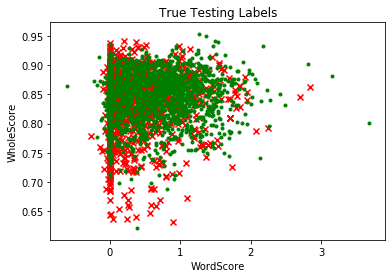

In [14]:
plotting(X_test, y_test, True)

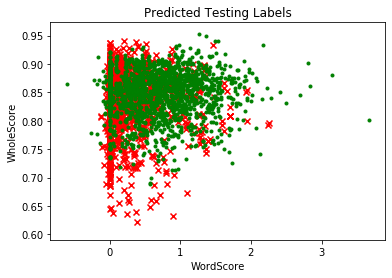

In [15]:
plotting(X_test, y_val, False)

The first version of our model was able to predict correctly around 62% of the time. Going to make a function now to test different features, with different parameters. Multiple functions will be created for different machine learning models. Might be nice to send to an excel spreadsheet or something every time the function is run. That way we can keep track of a lot of data. Just realized we can't use upvote ratios or scores as a feature since we do not have access to the scores of the removed
comments

In [16]:
comments_df = pd.read_csv('files/compiled_comments_3_14_2021.csv')
comments_df

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,...,no_url_WordScore,no_url_WholeScore,WordScoreNoStop,WholeScoreNoStop,no_url_or_stops_WholeScore,no_url_or_stops_WordScore,no_url_or_stops_content,NER_count,NER_match,length
0,True,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655,0.001573,False,...,0.000000,0.816813,0.000000,0.773069,0.736582,0.000000,So implications here? Does affect involved Vis...,0,0,115.0
1,True,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283,0.255802,False,...,0.000000,0.884829,0.000000,0.857654,0.844658,0.000000,Sadly isn't new. Police officers use faulty te...,0,0,589.0
2,True,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078,0.000000,False,...,-0.038865,0.866455,-0.038865,0.833865,0.785302,-0.038865,What's disturbing government destroying lives ...,1,0,100.0
3,True,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426,0.000000,True,...,0.000000,0.884435,0.000000,0.865826,0.852412,0.000000,What I find concerning horrible response law e...,1,0,233.0
4,True,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127,0.000000,False,...,0.000000,0.835723,0.000000,0.826162,0.804306,0.000000,This subject legs article opinion piece editor...,0,0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,True,"Yes, while in East Baghdad my platoons mission...",CapitalCockroach,NaN,bav0rl,ekggrgk,1.070477,0.840028,0.000000,True,...,1.070477,0.831097,1.000532,0.827872,0.788655,1.000532,"Yes, East Baghdad platoons mission check build...",3,0,339.0
10232,True,The [definition the FBI currently uses for int...,CQME,NaN,bav0rl,ekyelps,0.941533,0.882768,0.217543,True,...,0.884132,0.870870,0.606157,0.852373,0.843292,0.600762,The [definition FBI currently uses internation...,3,0,961.0
10233,True,[Yes.](https://en.m.wikipedia.org/wiki/Islamic...,Silent_As_The_Grave_,NaN,bav0rl,ekehcqg,0.217683,0.779386,0.000000,True,...,0.217683,0.833056,0.369440,0.782545,0.800717,0.369440,[Yes.] Have look allies with. Hezbollah fucks ...,1,0,140.0
10234,True,Has ANY Shia ever committed an act of terroris...,bsmdphdjd,NaN,bav0rl,ekfp4ls,1.293729,0.861529,0.000000,False,...,1.293729,0.847163,1.788263,0.834425,0.792615,1.788263,Has ANY Shia committed act terrorism U.S.?\n\n...,4,0,142.0


In [17]:
def set_up_train_test_split(df, feature_list, target_name, test_size):
    X = df[feature_list]
    X = X.to_numpy()
    y = df[target_name]
    y = y.to_numpy()
    rand_state = random.randint(0, 1000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=rand_state)
    return X_train, X_test, y_train, y_test

def determine_accuracy(y_test, y_val):
    percent_arr = (y_test == y_val)
    count = np.count_nonzero(percent_arr)
    percentage = (count/(len(percent_arr)))*100
    return percentage

In [18]:
#Input dataframe, features, target value, test size, and number of neighbors and get accuracy of k nearest neighbors
def K_nearest_neighbors_func(df, feature_list, target_name, test_size, number_neighbors):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    #fit nearest neighbors model
    neigh = KNeighborsClassifier(n_neighbors = 5)
    neigh.fit(X_train, y_train)
    
    #predict with the model
    y_val = neigh.predict(X_test)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, number_neighbors, percentage]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'number of neighbors', 'percent correct'])
    return_df.to_csv('files/ML_Results/KNN_Results.csv', mode='a', header=False, index=False)
    
    return percentage

features = ['WordScore', 'WholeScore', 'tfidf', 'contains_url', 'adjWordScore', 'profanity', 'contains_!', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 'length']
K_nearest_neighbors_func(comments_df, features, 'action', 0.33, 5)

67.64357608052102

In [19]:
def ridge_class_func(df, feature_list, target_name, test_size):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    #fit ridge classifier to x and y training set
    clf = RidgeClassifier().fit(X_train, y_train)
    
    #Predict with ridge classifier on x and y testing set
    y_val = clf.predict(X_test)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, percentage]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'percent correct'])
    return_df.to_csv('files/ML_Results/RidgeClassifier_Results.csv', mode = 'a', header = False, index=False)
    
    return percentage

features = ['WordScore', 'WholeScore', 'tfidf', 'contains_url', 'adjWordScore', 'profanity', 'contains_!', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 'length']
ridge_class_func(comments_df, features, 'action', 0.33)

74.6299585553582

Feature: tfidf, Score: 0.1599853929896377
Feature: WordScore, Score: -0.1516125800156789
Feature: WholeScore, Score: -3.752783939612326
Feature: contains_url, Score: 0.23389956490905534
Feature: adjWordScore, Score: 0.10758342421506102
Feature: profanity, Score: -0.13085110731125116
Feature: contains_!, Score: 0.008290365372063848
Feature: no_url_WordScore, Score: 0.09957882501155842
Feature: no_url_WholeScore, Score: 4.694778456598841
Feature: WordScoreNoStop, Score: -0.10408006687561776
Feature: WholeScoreNoStop, Score: 0.4334012790746842
Feature: no_url_or_stops_WholeScore, Score: 0.15673245504735472
Feature: no_url_or_stops_WordScore, Score: 0.1348405546315589
Feature: length, Score: 2.1904981569141714e-05
Percentage correct = 75.66607460035524


Index(['action', 'content', 'author', 'details', 'submissionId', 'commentId',
       'WordScore', 'WholeScore', 'tfidf', 'contains_url', 'text_without_url',
       'article_score', 'comment_score', 'all_comments_scores',
       'comment_article_score_ratio', 'comment_comments_score_ratio',
       'adjWordScore', 'profanity', 'contains_!', 'no_url_WordScore',
       'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop',
       'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore',
       'no_url_or_stops_content', 'NER_count', 'NER_match', 'length'],
      dtype='object')

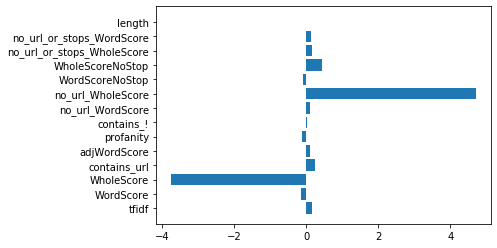

In [20]:
#input dataframe, feature list, target name, test size, alpha (regularization strength as a positive float...the bigger
#the number, the more regularized...default is 1), and threshold (this will determine the difference between a good 
#comment and a bad comment)
def ridge_reg_func(df, feature_list, target_name, test_size, alpha, threshold):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    #fit the model
    clf = Ridge(alpha = alpha)
    clf.fit(X_train, y_train)
    
    #Predict with ridge regression on testing set
    y_val = clf.predict(X_test)
    
    #Convert the values
    y_val = (y_val>=threshold)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Determine feature importance
    importance = clf.coef_
    importance_list = []
    for i, v in enumerate(importance):
        importance_list.append([feature_list[i], v])
        print('Feature: ' + feature_list[i] + ', Score: ' + str(v))
    
    plt.barh(features, importance)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, alpha, threshold, importance_list, percentage]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'alpha', 'threshold', 'importance scores', 'percent_correct'])
    return_df.to_csv('files/ML_Results/RidgeRegression_Results.csv', mode='a', header=False, index=False)
    
    return percentage



features = ['tfidf', 'WordScore', 'WholeScore', 'contains_url', 'adjWordScore', 'profanity', 'contains_!', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore', 'length']
perc = ridge_reg_func(comments_df, features, 'action', 0.33, 1.0, 0.5)

print("Percentage correct = " + str(perc))
comments_df.columns

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
def decision_tree_class_func(df, feature_list, target_name, test_size):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    #fit ridge classifier to x and y training set
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    
    #Predict with ridge classifier on x and y testing set
    y_val = clf.predict(X_test)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, percentage]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'percent correct'])
    return_df.to_csv('files/ML_Results/DecisionTreeClassifier_Results.csv', mode = 'a', header = False, index=False)
    
    return percentage

features = ['tfidf', 'WordScore', 'WholeScore', 'contains_url', 'adjWordScore', 'profanity', 
            'contains_!', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop',
            'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore', 'length']
decision_tree_class_func(comments_df, features, 'action', 0.33)

74.6299585553582

In [24]:
comments_df[comments_df['action'] == False]

,action,content,author,details,submissionId,commentId,WordScore,WholeScore,tfidf,contains_url,...,no_url_WordScore,no_url_WholeScore,WordScoreNoStop,WholeScoreNoStop,no_url_or_stops_WholeScore,no_url_or_stops_WordScore,no_url_or_stops_content,NER_count,NER_match,length
1066,False,"How is this""neutral news""? Literally, it's rep...",b756df5867ce042f3a07f3037e5eeeb9,Rule 5: top-level comment has no links,cgd7ut,5dea4ee94af43200093a2f4c,0.000000,0.912878,0.000000,False,...,0.000000,0.857286,0.000000,0.871541,0.874117,0.000000,"How this""neutral news""? Literally, it's report...",0,0,87.0
1067,False,Just wondering if you have any updates.,58843f7430c71f72208766a295eaae5e,Low effort top-level comment,cim6kf,5dea4ee94af43200093a2f4d,0.000000,0.908528,0.058479,False,...,0.000000,0.866141,0.000000,0.825392,0.824577,0.000000,Just wondering updates.,0,0,39.0
1068,False,.,f9dcef98ec140a8f44d5691d34081408,Rule 5: top-level comment has no links,cfzkky,5dea4ee94af43200093a2f4e,0.000000,0.867635,0.000000,False,...,0.000000,0.743596,0.000000,0.836637,0.855241,0.000000,.,0,0,1.0
1069,False,I went to park,aab8641b0dc26f59e9c8fea95f470138,Low effort top-level comment,asrdao,5dea4ee94af43200093a2f4f,0.000000,0.881256,0.000000,False,...,0.000000,0.777272,0.000000,0.839757,0.840471,0.000000,I went park,0,0,14.0
1070,False,"Hi, u/SFepicure\n\n[I think you may enjoy this...",e48fe0135108ee9985e260caf57cc6e0,remove,b47a1d,5dea4ee94af43200093a2f50,0.000000,0.849436,0.000000,True,...,0.000000,0.773582,0.000000,0.830657,0.822835,0.000000,"Hi, u/SFepicure\n\n[I think enjoy this!]",0,0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,False,It will last 3 to 4 days. This is a sham!\n\nh...,38e2216dc3dc2cb196cbf4bab0d83541,confirm_ham,j0ijwn,5f70e968dbe1ef0009d976e5,0.159531,0.817497,0.000000,True,...,0.159531,0.775652,0.037888,0.747354,0.734783,0.037888,"It 3 4 days. This sham!\n\n\n\nEdit: Sorry, I ...",1,0,234.0
6015,False,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7,0.000000,0.838691,0.000000,False,...,0.000000,0.775602,0.000000,0.772601,0.756565,0.000000,"Oh I thought posting arbitrary facts source, e...",0,0,115.0
6016,False,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9,0.459704,0.840920,0.000000,False,...,0.459704,0.813289,0.495156,0.781849,0.746439,0.495156,No. The senate wasting time fill seat. You n...,1,1,119.0
6017,False,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717,1.281814,0.863294,0.017060,True,...,1.232991,0.858643,1.270814,0.829253,0.806490,0.938139,"My point addressed, providing incorrect inform...",8,0,1122.0


Percentage correct: 82.421875



array([[0, 0, 0.0042810564605160785, ..., 0.8254415903752347, 0.0, 72.0],
       [1, 0, 0.0, ..., 0.7941825767866909, 0.2393043658031475, 11.0],
       [1, 0, 0.0, ..., 0.818681748389337, 0.3448570945401761, 290.0],
       ...,
       [3, 1, 0.0, ..., 0.7178307975850974, 0.3908762895006753, 279.0],
       [5, 0, 0.0, ..., 0.7963676597171091, 0.5956538632337582, 585.0],
       [7, 0, 0.450863145687693, ..., 0.7647277799997704,
        0.966563556153744, 582.0]], dtype=object)

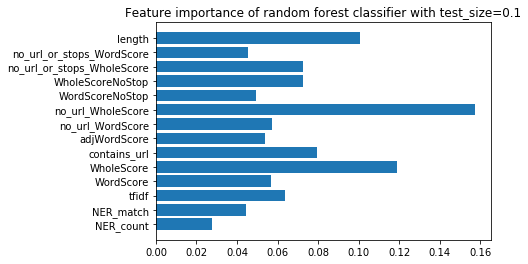

In [25]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
def random_forest_class_func(df, feature_list, target_name, test_size, estimators):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    #fit ridge classifier to x and y training set
    clf = RandomForestClassifier(n_estimators = estimators).fit(X_train, y_train)
    
    importances = clf.feature_importances_
    
    #Predict with ridge classifier on x and y testing set
    y_val = clf.predict(X_test)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, percentage, estimators]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'percent correct', 'n_estimators'])
    return_df.to_csv('files/ML_Results/RandomForestClassifier_Results.csv', mode='a', header=False, index=False)
    
    print('Percentage correct: ' + str(percentage) + '\n')
    plt.barh(feature_list, importances)
    plt.title('Feature importance of random forest classifier with test_size=' + str(test_size))
    
    return y_val, X_train

features = ['NER_count', 'NER_match', 'tfidf', 'WordScore', 'WholeScore', 'contains_url', 'adjWordScore', 
            'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 
            'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore', 'length']
test, X_train = random_forest_class_func(comments_df, features, 'action', 0.1, 1000)
X_train

Lime Stuff here

In [28]:
comments_df.columns

Index(['action', 'content', 'author', 'details', 'submissionId', 'commentId',
       'WordScore', 'WholeScore', 'tfidf', 'contains_url', 'text_without_url',
       'article_score', 'comment_score', 'all_comments_scores',
       'comment_article_score_ratio', 'comment_comments_score_ratio',
       'adjWordScore', 'profanity', 'contains_!', 'no_url_WordScore',
       'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop',
       'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore',
       'no_url_or_stops_content', 'NER_count', 'NER_match', 'length'],
      dtype='object')

In [29]:
features

['NER_count',
 'NER_match',
 'tfidf',
 'WordScore',
 'WholeScore',
 'contains_url',
 'adjWordScore',
 'no_url_WordScore',
 'no_url_WholeScore',
 'WordScoreNoStop',
 'WholeScoreNoStop',
 'no_url_or_stops_WholeScore',
 'no_url_or_stops_WordScore',
 'length']

In [ ]:
#New imports
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features,
    class_names=[False, True],
    mode='classification'
)

Percentage correct: 61.24925991711072



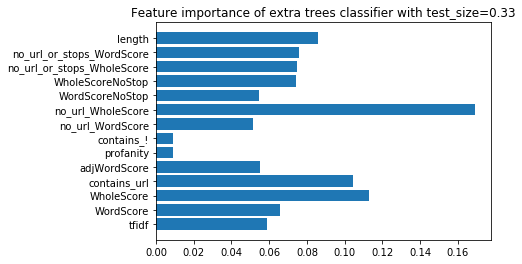

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
def extra_trees_class_func(df, feature_list, target_name, test_size):
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    clf = ExtraTreesClassifier().fit(X_train, y_train)
    
    importances = clf.feature_importances_
    
    y_val = clf.predict(X_test)
    
    data = [[feature_list, test_size, percentage]]
    return_df = pd.DataFrame(data, columns=['features', 'test size', 'percent correct'])
    return_df.to_csv('files/ML_Results/ExtraTreesClassifier_Results.csv', mode='a', header=False, index=False)
    
    print('Percentage correct: ' + str(percentage) + '\n')
    plt.barh(feature_list, importances)
    plt.title('Feature importance of extra trees classifier with test_size=' + str(test_size))
    

features = ['tfidf', 'WordScore', 'WholeScore', 'contains_url', 'adjWordScore', 'profanity', 'contains_!', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore', 'length']
extra_trees_class_func(comments_df, features, 'action', 0.33)

In [ ]:
# bad_comments = comments_df[comments_df['action'] == False]
# # bad_comments['comment_score'].unique()

In [27]:
# comments_df.columns

In [44]:
# #Need to fix the score ratios to account for infinity
# #Also add in a way to send this data to a csv
# def check_for_nan_inf(comments_df):
#     count = np.isinf(comments_df['comment_comments_score_ratio']).values.sum()
#     print('Number of infinities in comment_comments_score_ratio = ' + str(count))
#     count = np.isinf(comments_df['comment_article_score_ratio']).values.sum()
#     print('Number of infinities in comment_article_score_ratio = ' + str(count))
#     count = np.isnan(comments_df['comment_comments_score_ratio']).values.sum()
#     print('Number of nans in comment_comments_score_ratio = ' + str(count))
#     count = np.isnan(comments_df['comment_article_score_ratio']).values.sum()
#     print('Number of nans in comment_article_score_ratio = ' + str(count))

# #Something else I just thought about...the positive and negative signs on the ratios could be misleading. If both the 
# #comment and article are downvoted, it will have a positive ratio, if just one of them is downvoted it will be negative.
# #Need to think more about this

In [45]:
# comments_df['comment_comments_score_ratio'] = comments_df['comment_comments_score_ratio'].replace(np.nan, 0)
# comments_df['comment_article_score_ratio'] = comments_df['comment_article_score_ratio'].replace(np.nan, 0)

# comments_df['comment_comments_score_ratio'] = comments_df['comment_comments_score_ratio'].replace([np.inf, -np.inf], 0)
# comments_df['comment_article_score_ratio'] = comments_df['comment_article_score_ratio'].replace([np.inf, -np.inf], 0)

# check_for_nan_inf(comments_df)

In [46]:
# zero_df = comments_df[(comments_df['comment_comments_score_ratio'] == 0) | (comments_df['comment_article_score_ratio'] == 0)]
# zero_df
# comments_zero_df = zero_df[zero_df['comment_score'] == 0]
# (len(comments_zero_df)/len(zero_df))*100

Since almost 100% of the comments where there were infinities, nans, or zeros already, I think it is safe to just keep all the ratios to zero when there is a nan or infinity

In [47]:
# random_sampling['comment_comments_score_ratio'] = random_sampling['comment_comments_score_ratio'].replace(0, random_sampling['comment_score'])

# random_sampling.iloc[0]

In [179]:
# comments_df.to_csv('files/compiled_comments_2_24_2021.csv', index=False)

## Everything below here is used for grabbing examples of what the model finds good and bad as well as what it guessed correctly and incorrectly

In [16]:
full_comment_data = pd.read_csv('files/full_comment_data_with_features1111.csv')
full_topics_data = pd.read_csv('files/full_topics_data1111.csv')

In [17]:
def grabbingExamples(x, yval, ytest, number):
    predicted_comment_row = full_comment_data[full_comment_data['WholeScore'] == x[number][1]]
    predicted_comment_row = predicted_comment_row.reset_index(drop=True)
    
    if len(predicted_comment_row.index) != 1:
        predicted_comment_row = predicted_comment_row[predicted_comment_row['WordScore'] == x[number][1]]
        predicted_comment_row = predicted_comment_row.reset_index(drop=True)

    predicted_topic_row = full_topics_data[full_topics_data['id'] == predicted_comment_row['submissionId'].iloc[0]]
    predicted_comment = predicted_comment_row['content'].values[0]
    predicted_article_text = predicted_topic_row['text'].values[0]
    predicted_article_url = predicted_topic_row['url'].values[0]
    predicted_article_reason_for_removal = predicted_comment_row['details'].values[0]
    yval = yval[number]
    ytest = ytest[number]
    if yval != ytest:
        print('Incorrect Prediction')
        if yval == False:
            print('Predicted bad comment, but was good comment')
        else:
            print('Predicted good comment, but was bad comment')
    else:
        print('Correct Prediction')
        if yval == False:
            print('Correctly predicted bad comment')
        else:
            print('Correctly predicted good comment')
    print('\nThe url that was predicted on: ')
    print(predicted_article_url)
    print('\nThe comment that was predicted on: ')
    print(predicted_comment)
    print('\nThe reason that the comment was removed: ')
    print(predicted_article_reason_for_removal)
    return predicted_article_text

In [18]:
def grabbingExamplesForArray(x, yval, ytest, number):
    predicted_comment_row = full_comment_data[(full_comment_data['WholeScore'] == x[number][1]) & (full_comment_data['WordScore'] == x[number][0])]
    predicted_comment_row = predicted_comment_row.reset_index(drop=True)
    
    if len(predicted_comment_row.index) != 1:
        return

    predicted_topic_row = full_topics_data[full_topics_data['id'] == predicted_comment_row['submissionId'].iloc[0]]
    predicted_comment = predicted_comment_row['content'].values[0]
    predicted_article_text = predicted_topic_row['text'].values[0]
    predicted_article_url = predicted_topic_row['url'].values[0]
    predicted_article_reason_for_removal = predicted_comment_row['details'].values[0]
    yval = yval[number]
    ytest = ytest[number]
    if yval != ytest:
        if yval == False:
            predicted_bad_but_is_good.append(number)
        else:
            predicted_good_but_is_bad.append(number)
    else:
        if yval == False:
            correct_prediction_bad.append(number)
        else:
            correct_prediction_good.append(number)

In [19]:
predicted_bad_but_is_good = []
predicted_good_but_is_bad = []
correct_prediction_good = []
correct_prediction_bad = []

for i in range(2386):
    grabbingExamplesForArray(X_test, y_val, y_test, i)
    

In [20]:
import random
def grabIncorrectlyBadComment():
    integ = random.randint(1, len(predicted_bad_but_is_good))
    number = predicted_bad_but_is_good[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
    
def grabIncorrectlyGoodComment():
    integ = random.randint(1, len(predicted_good_but_is_bad))
    number = predicted_good_but_is_bad[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
def grabCorrectGoodComment():
    integ = random.randint(1, len(correct_prediction_good))
    number = correct_prediction_good[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
    
def grabCorrectBadComment():
    integ = random.randint(1, len(correct_prediction_bad))
    number = correct_prediction_bad[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    

In [21]:
grabIncorrectlyBadComment()

Incorrect Prediction
Predicted bad comment, but was good comment

The url that was predicted on: 
https://apnews.com/2fcfa5dda00956b44ffa6dd19564bc36

The comment that was predicted on: 
**/r/NeutralNews is a curated space.** 

In order not to get your comment removed, please familiarize yourself with our [rules on commenting](https://www.reddit.com//r/neutralnews/wiki/guidelines#wiki_comments_.28good.2C_bad_.26amp.3B_ugly.29) before you participate:

#Comment Rules

We expect the following from all users:


1. Be courteous to other users.

1. Source your facts.

1. Be substantive.

1. Address the arguments, not the person.


If you see a comment that violates any of these essential rules, click the associated *report* link so mods can attend to it.

However, **please note that the mods will not remove comments or links reported for lack of neutrality**. There is [no neutrality requirement for comments or links](https://www.reddit.com//r/neutralnews/wiki/guidelines#wiki_neutral-ness) i

In [22]:
grabIncorrectlyGoodComment()

Incorrect Prediction
Predicted good comment, but was bad comment

The url that was predicted on: 
https://www.businessinsider.com/fox-news-karen-mcdougal-case-tucker-carlson-2020-9?r=US&IR=T

The comment that was predicted on: 
Her family lied about their actual heritage.  Playing up an indian heritage that was basically nill.  So her mom would be 5 to 9 generations out.  Her dna test and her own statement about blindly believing her family, support the fact that her family lied.

The reason that the comment was removed: 
confirm_ham

The index of the comment is 279


In [23]:
grabCorrectGoodComment()

Correct Prediction
Correctly predicted good comment

The url that was predicted on: 
https://www.nytimes.com/2020/07/10/us/politics/trump-schools-reopening.html?searchResultPosition=1

The comment that was predicted on: 
I’d like to weigh in on this as a student. It’s infuriating that I’m being made to choose between a proper education and my life. No matter what they choose I loose. Many of the classes that help me in the fields I have been working towards entering cannot be taught online, but it will not be safe with the current case levels and regulations in place if I do choose to go back to school. I feel that not enough has been done to keep me and other students safe.

The reason that the comment was removed: 
nan

The index of the comment is 1437


In [24]:
grabCorrectBadComment()

Correct Prediction
Correctly predicted bad comment

The url that was predicted on: 
https://www.cnn.com/2020/09/09/politics/bob-woodward-rage-book-trump-coronavirus/index.html

The comment that was predicted on: 
Lol what. How is this person in charge of anything?

The reason that the comment was removed: 
remove

The index of the comment is 464
